In [ ]:
#Part B - i

#I created a database called myfltdata in mySQL via the Workbench platform
#I created empty tables with columns matching the columns in the associated csv files
#I used the mySQL data import wizard to populate the tables for Airlines and Airports, which did not need to be cleaned

In [18]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#These functions converted the cleaned dataframe to a csv file in Part A 

#FlightC5.to_csv('FlightC5.csv')
#WeatherC3.to_csv('WeatherC3.csv')
#PlaneC.to_csv('PlaneC2.csv')

In [ ]:
#I also used the mySQL data import wizard to populate the empty tables for Plane.
#Unfortunately, when I attempted to use the same process for the Flights and Weather datasets, the import wizard ran prohibitively slow for these larger datasets.

In [ ]:
#I used the LOAD DATA INFILE function in mySQL to import the data from Flights and Weather into their associated empty tables.

In [ ]:
#Part B - ii

#SQL command to populate empty table for Weather with the cleaned dataset

#Load data local infile 'C:/Users/Justin/Documents/Grad Courses/DNSC 6211 - Programming for Analytics/Week 10/Assignment 9/WeatherC3.csv'

#into table myfltdata.weather

#fields terminated by ',' 

#enclosed by '"'

#lines terminated by '\n';


In [ ]:
#SQL command to populate empty table for Flights with the cleaned dataset

#Load data local infile 'C:/Users/Justin/Documents/Grad Courses/DNSC 6211 - Programming for Analytics/Week 10/Assignment 9/FlightC5.csv'

#into table myfltdata.flights

#fields terminated by ',' 

#enclosed by '"'

#lines terminated by '\n';

In [8]:
#Part B - iii
#SQL code to join the Flights and Weather tables

#select * 

#from weather

#left join flights on weather.year = flights.year and weather.month = flights.month and weather.day = flights.day and weather.hour = flights.hour and weather.origin = flights.origin;

SyntaxError: invalid syntax (<ipython-input-8-89525d3aedf8>, line 3)

In [ ]:
#I filtered the table to include only flights originating from JFK in SQL because this is the only data I need for the analysis

#select *

#from weather

#left join flights on weather.year = flights.year and weather.month = flights.month and weather.day = flights.day and weather.hour = flights.hour and weather.origin = flights.origin

#where flights.origin = "JFK";

In [11]:
#read the joined tables filtered by JFK into one file

JFK = pd.read_csv('C:/Users/Justin/Documents/Grad Courses/DNSC 6211 - Programming for Analytics/Week 10/Assignment 9/JFK.csv')

In [12]:
#ensure the data was properly read into pandas

JFK.head(n=5)

,idweather,precip,visib,temp,dewp,humid,pressure,wind_dur,wind_gust,wind_speed,...,dest,distance,hour.1,minute,time_hour.1,dep_time,air_time,arr_delay,arr_time,dep_delay
0,8713,0,10,39,26,59,1012,260,14,12,...,MCO,944,6,0,557,140,-8,838,-3,NaN
1,8713,0,10,39,26,59,1012,260,14,12,...,PBI,1028,6,0,558,149,-2,849,-2,NaN
2,8713,0,10,39,26,59,1012,260,14,12,...,TPA,1005,6,0,558,158,-3,853,-2,NaN
3,8713,0,10,39,26,59,1012,260,14,12,...,LAX,2475,6,0,558,345,7,924,-2,NaN
4,8713,0,10,39,26,59,1012,260,14,12,...,ATL,760,6,10,606,128,-8,837,-4,NaN


In [13]:
#checking the data types for the different columns

JFK.dtypes

idweather           int64
precip              int64
visib               int64
temp                int64
dewp                int64
humid               int64
pressure            int64
wind_dur            int64
wind_gust           int64
wind_speed          int64
day                 int64
hour                int64
month               int64
origin             object
time_hour          object
year                int64
idflights           int64
Column1             int64
year.1              int64
month.1             int64
day.1               int64
sched_dep_time      int64
sched_arr_time      int64
carrier            object
flight              int64
origin.1           object
dest               object
distance            int64
hour.1              int64
minute              int64
time_hour.1         int64
dep_time            int64
air_time            int64
arr_delay           int64
arr_time            int64
dep_delay         float64
dtype: object

In [ ]:
#Unfortunately, the data in the dep_delay column got moved to the arr_time column during the data import in SQL
#the mySQL server presented connectivity issues when I went back to fix the issue, so I will continue the analysis using arr_time as dep_delay

In [14]:
#Part B - iv
#convert JFK dataset into JFK 2 that only keeps the delays greater than 10 minutes

JFK2 = JFK[JFK.arr_time > 10]
JFK2.head(n=10)

,idweather,precip,visib,temp,dewp,humid,pressure,wind_dur,wind_gust,wind_speed,...,dest,distance,hour.1,minute,time_hour.1,dep_time,air_time,arr_delay,arr_time,dep_delay
5,8713,0,10,39,26,59,1012,260,14,12,...,SFO,2586,6,0,611,366,14,945,11,NaN
27,8714,0,10,39,26,59,1012,270,13,11,...,LAX,2475,7,30,743,358,7,1107,13,NaN
29,8714,0,10,39,26,59,1012,270,13,11,...,SEA,2422,7,30,743,349,3,1059,13,NaN
48,8714,0,10,39,26,59,1012,270,13,11,...,MIA,1089,7,15,826,160,51,1136,71,NaN
53,8725,0,10,37,26,64,1017,340,17,14,...,BWI,184,18,35,848,41,851,1001,853,NaN
60,8715,0,10,39,26,59,1012,260,17,14,...,STT,1623,8,10,909,184,16,1331,59,NaN
61,8716,0,10,39,28,62,1012,250,19,17,...,MIA,1089,9,0,912,166,21,1241,12,NaN
64,8716,0,10,39,28,62,1012,250,19,17,...,IAD,228,9,5,920,52,14,1039,15,NaN
65,8716,0,10,39,28,62,1012,250,19,17,...,LAX,2475,9,0,921,333,10,1237,21,NaN
70,8716,0,10,39,28,62,1012,250,19,17,...,FLL,1069,9,4,933,170,42,1252,29,NaN


In [15]:
#calling the new table that provides JFK flights delayed by greater than 10 minutes as mydelay

mydelay = JFK2
mydelay.head(n=5)

,idweather,precip,visib,temp,dewp,humid,pressure,wind_dur,wind_gust,wind_speed,...,dest,distance,hour.1,minute,time_hour.1,dep_time,air_time,arr_delay,arr_time,dep_delay
5,8713,0,10,39,26,59,1012,260,14,12,...,SFO,2586,6,0,611,366,14,945,11,NaN
27,8714,0,10,39,26,59,1012,270,13,11,...,LAX,2475,7,30,743,358,7,1107,13,NaN
29,8714,0,10,39,26,59,1012,270,13,11,...,SEA,2422,7,30,743,349,3,1059,13,NaN
48,8714,0,10,39,26,59,1012,270,13,11,...,MIA,1089,7,15,826,160,51,1136,71,NaN
53,8725,0,10,37,26,64,1017,340,17,14,...,BWI,184,18,35,848,41,851,1001,853,NaN


In [16]:
# Part B - v
#find the mean of temperature, humidity, wind speed, and precipitation for flights departing from JFK that were delayed by more than 10 minutes.

aa = mydelay['temp'].mean()
bb = mydelay['humid'].mean()
cc = mydelay['wind_speed'].mean()
dd = mydelay['precip'].mean()
print(aa, bb, cc, dd)

34.7308533916849 52.37199124726477 12.969365426695843 0.0


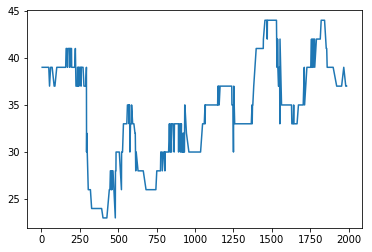

In [20]:
#Part B - vi
#plotting distributions for the different weather variables

plt.plot(mydelay['temp'])
plt.show()

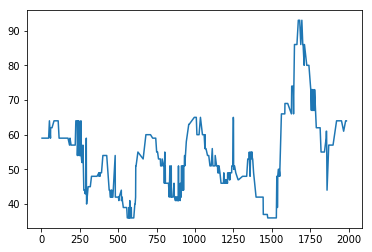

In [21]:
plt.plot(mydelay['humid'])
plt.show()

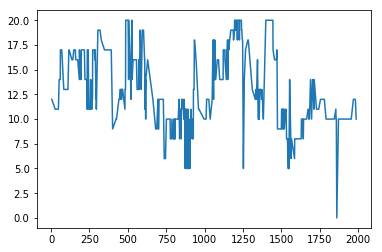

In [22]:
plt.plot(mydelay['wind_speed'])
plt.show()

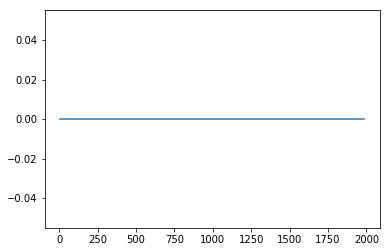

In [23]:
plt.plot(mydelay['precip'])
plt.show()

In [24]:
#Part B - vii
#saving my delay as a csv file!!

mydelay.to_csv('mydelay.csv')